<a href="https://colab.research.google.com/github/Atharva-K12/Memes-vs-Notes/blob/master/CNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Dataloader

In [88]:
input_dir1="/content/drive/My Drive/Dataset_memes_vs_notes/Memes"
input_dir2="/content/drive/My Drive/Dataset_memes_vs_notes/Notes"
data0=[]
data1 = []
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
X_dev=[]
Y_dev=[]
c=1
for file in os.listdir(input_dir1):
  img =np.array((Image.open(input_dir1 + '/' + file).convert('RGB')),dtype='float64')
  data1.append([img,c])
c=0
for file in os.listdir(input_dir2):
  img =np.array((Image.open(input_dir2 + '/' + file).convert('RGB')),dtype='float64')
  data0.append([img,c])
np.random.seed(0)
train = data0[:700] + data1[:700]
dev = data0[700:750] + data1[700:750]
test = data0[750:] + data1[750:]
np.random.shuffle(train)
np.random.shuffle(test)
np.random.shuffle(dev)
for x,y in train:
  X_train.append(x)
  Y_train.append(y)
for x,y in test:
  X_test.append(x)
  Y_test.append(y)
for x,y in dev:
  X_dev.append(x)
  Y_dev.append(y)
X_train=torch.Tensor(X_train)
Y_train=torch.tensor(Y_train)
X_dev=torch.Tensor(X_dev)
Y_dev=torch.tensor(Y_dev)
X_test=torch.Tensor(X_test)
Y_test=torch.tensor(Y_test)
print("Loaded!")

Loaded!


## CNN Model Class

In [89]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Sequential(
      nn.Conv2d(3,50,9,stride=5),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=5,stride=1),
    )
    self.conv2=nn.Sequential(
      nn.Conv2d(50,70,7,stride=4),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=3,stride=1),
    )
    self.conv3=nn.Sequential(
      nn.Conv2d(70,90,3,stride=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=3,stride=1),
    )
    self.fc1=nn.Linear(4*4*90,90)
    self.fc2=nn.Linear(90,2)
  def forward(self,X):
    X=self.conv1(X)
    X=self.conv2(X)
    X=self.conv3(X)
    X=X.view(-1,4*4*90)
    X=F.relu(self.fc1(X))
    X=self.fc2(X)
    return X

Model Object created

In [90]:
model=Model()
cost_f=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0009)


##Prediction function

In [120]:
def predict(y_eval,y):
  prediction=F.softmax(y_eval,dim=1)
  prediction=torch.argmax(prediction,axis=1)
  correct=0
  for i in range(len(y)):
    if y[i] == prediction[i]:
      correct+= 1
  return 100 * correct/y.shape[0]



##Function to train data

In [137]:
def trainer(X,Y,epoch):
  costs=[]
  mini_costs=[]
  batch_size=100
  for i in range(epoch):
    total_cost=0
    for j in range(int(X.size(0)/batch_size)):
      optimizer.zero_grad()
      X_mini=X[j*batch_size:(j+1)*batch_size]
      Y_mini=Y[j*batch_size:(j+1)*batch_size].view(batch_size,1)
      AL=model(X_mini.permute(0,3,1,2))
      cost=cost_f(AL,torch.squeeze(Y_mini))
      cost.backward()
      optimizer.step()
      mini_costs.append(cost)
      total_cost+=cost
    print("Cost = "+str((total_cost/batch_size).item()))
    costs.append(total_cost/batch_size)
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('epochs')
  plt.show()
  plt.plot(mini_costs)
  plt.ylabel('cost')
  plt.xlabel('iterations')
  plt.show()
  with torch.no_grad():
    Y_eval=model.forward(X_train.permute(0,3,1,2))
    prediction=predict(Y_eval,Y)
    print("Accuracy on Train set is "+str(prediction))

training and predicting for train set

Cost = 0.0011514774523675442
Cost = 0.0010142481187358499
Cost = 0.0009273054311051965
Cost = 0.0009399527916684747


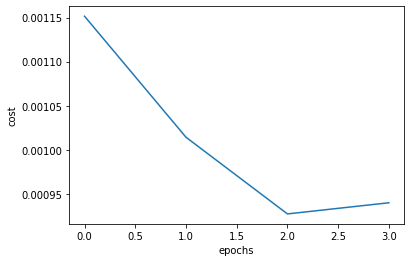

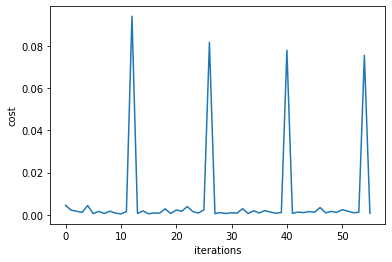

Accuracy on Train set is 99.92857142857143


In [138]:
trainer(X_train,Y_train,4)

Training and predicting on validation set

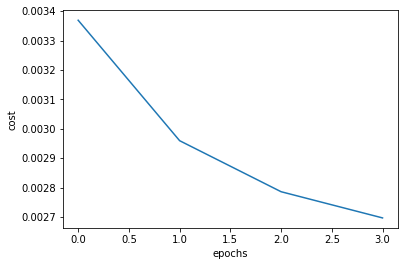

Accuracy on Dev set is 100.0


In [139]:
costs=[]
for i in range(4):
  optimizer.zero_grad()
  AL=model.forward(X_dev.permute(0,3,1,2))
  cost=cost_f(AL,torch.squeeze(Y_dev))
  costs.append(cost)
  cost.backward()
  optimizer.step()
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()
with torch.no_grad():
  Y_eval=model.forward(X_dev.permute(0,3,1,2))
  prediction=predict(Y_eval,Y_dev)
  print("Accuracy on Dev set is "+str(prediction))


Predicting on test set

In [140]:
with torch.no_grad():
    Y_eval=model.forward(X_test.permute(0,3,1,2))
    prediction=predict(Y_eval,Y_test)
    print("Accuracy on test is "+str(prediction))

Accuracy on test is 100.0
